# Word Counts per Document

In [10]:
import json
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ipywidgets as widgets
from IPython.display import display
import nltk
import numpy as np

# Ensure that NLTK's tokenizers and stopwords are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Path to the directory containing JSON files
root_dir = './Republic Acts'

# Load data from JSON files including any subdirectories containing JSON files
def load_data(root_dir):
    data_list = []
    for subdir, dirs, files in os.walk(root_dir):
        for filename in files:
            if filename.endswith('.json'):
                file_path = os.path.join(subdir, filename)
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    if 'text' in data and 'date' in data:
                        data_list.append({'year': data['date'][:4], 'text': data['text']})
    return pd.DataFrame(data_list)

df = load_data(root_dir)

# Process text and count words
def preprocess_text(texts):
    combined_text = ' '.join(texts)
    tokens = word_tokenize(combined_text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return words

df['words'] = df['text'].apply(preprocess_text)
word_counts_per_year = df.groupby('year')['words'].sum().apply(lambda words: Counter(words))

# Prepare data for visualization
top_words_per_year = {year: counts.most_common(10) for year, counts in word_counts_per_year.items()}

# List of color palettes
color_palettes = ['summer', 'autumn', 'winter', 'spring', 'cool', 'Wistia']

# Function to plot top words with dynamic color palettes
def plot_top_words(year):
    if year in top_words_per_year:
        words, counts = zip(*top_words_per_year[year])
        plt.figure(figsize=(10, 8))

        # Generate a palette with as many colors as there are words
        base_palette = sns.color_palette(color_palettes[int(year) % len(color_palettes)], n_colors=len(words))
        extended_palette = np.tile(base_palette, (len(words) // len(base_palette) + 1, 1))[:len(words)]

        # Create a bar plot where each bar has a unique color
        bars = plt.barh(words, counts, color=extended_palette)  # Horizontal bar plot with individual colors
        plt.title(f'Top 10 Words for Republic Acts in {year}')
        plt.xlabel('Counts')
        plt.ylabel('Words')
        plt.show()
    else:
        print("No data available for this year.")

# Interactive widgets
year_picker = widgets.Dropdown(
    options=sorted(top_words_per_year.keys()),
    value=next(iter(top_words_per_year)),  # default to the first available year
    description='Year:',
)

interactive_plot = widgets.interactive(plot_top_words, year=year_picker)
display(interactive_plot)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


interactive(children=(Dropdown(description='Year:', options=('1946', '1947', '1948', '1949', '1950', '1951', '…

In [11]:
import json
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ipywidgets as widgets
from IPython.display import display
import nltk
import numpy as np

# Ensure that NLTK's tokenizers and stopwords are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Path to the directory containing JSON files
root_dir = './Supreme Court Jurisprudence'
# Path to the directory to save plots
plots_dir = './plots'

# Ensure the plots directory exists
os.makedirs(plots_dir, exist_ok=True)

# Load data from JSON files including any subdirectories containing JSON files
def load_data(root_dir):
    data_list = []
    for subdir, dirs, files in os.walk(root_dir):
        for filename in files:
            if filename.endswith('.json'):
                file_path = os.path.join(subdir, filename)
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    if 'text' in data and 'date' in data:
                        data_list.append({'year': data['date'][:4], 'text': data['text']})
                    else:
                        print(f"Missing 'text' or 'date' in file: {file_path}")
    return pd.DataFrame(data_list)

df = load_data(root_dir)

# Check if the DataFrame is loaded correctly
print(df.head())

# Process text and count words
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return words

# Apply the function to each text entry
if 'text' in df.columns:
    df['words'] = df['text'].apply(preprocess_text)
    word_counts_per_year = df.groupby('year')['words'].sum().apply(lambda words: Counter(words))

    # Prepare data for visualization
    top_words_per_year = {year: counts.most_common(10) for year, counts in word_counts_per_year.items()}

    # List of color palettes
    color_palettes = ['summer', 'autumn', 'winter', 'spring', 'cool', 'Wistia']

    # Function to plot top words with dynamic color palettes
    def plot_top_words(year, save_plot=False):
        if year in top_words_per_year:
            words, counts = zip(*top_words_per_year[year])
            plt.figure(figsize=(10, 8))

            # Generate a palette with as many colors as there are words
            base_palette = sns.color_palette(color_palettes[int(year) % len(color_palettes)], n_colors=len(words))
            extended_palette = np.tile(base_palette, (len(words) // len(base_palette) + 1, 1))[:len(words)]

            # Create a bar plot where each bar has a unique color
            plt.barh(words, counts, color=extended_palette)  # Horizontal bar plot with individual colors
            plt.title(f'Top 10 Words for Supreme Court Jurisprudence in {year}')
            plt.xlabel('Counts')
            plt.ylabel('Words')

            if save_plot:
                plt.savefig(os.path.join(plots_dir, f'top_words_{year}.png'))
            
            plt.show()
        else:
            print("No data available for this year.")

    # Interactive widgets
    year_picker = widgets.Dropdown(
        options=sorted(top_words_per_year.keys()),
        value=next(iter(top_words_per_year)),  # default to the first available year
        description='Year:',
    )

    interactive_plot = widgets.interactive(plot_top_words, year=year_picker, save_plot=widgets.fixed(True))
    display(interactive_plot)
else:
    print("The DataFrame does not contain a 'text' column.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


interactive(children=(Dropdown(description='Year:', options=('1946', '1947', '1948', '1949', '1950', '1951', '…

## WordClouds for All Documents and All Document Types

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


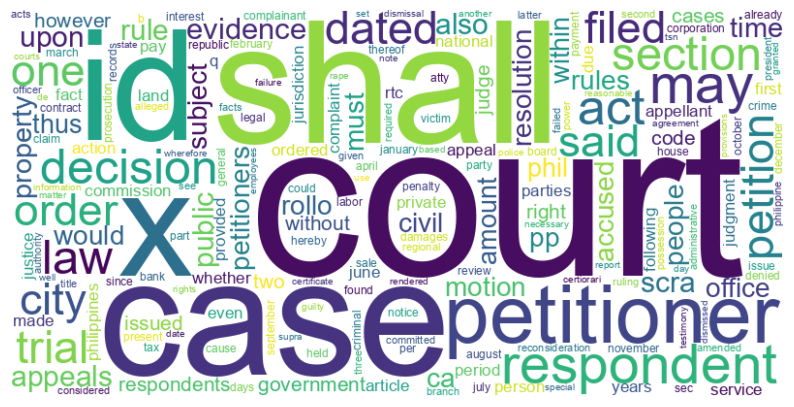

In [17]:
import json
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter

# Ensure that NLTK's tokenizers and stopwords are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Path to the directory containing JSON files
root_dir = './Thesis Data'  # Modify this path according to your directory structure

# Load data from JSON files including any subdirectories containing JSON files
def load_data(root_dir):
    data_list = []
    for subdir, dirs, files in os.walk(root_dir):
        for filename in files:
            if filename.endswith('.json'):
                file_path = os.path.join(subdir, filename)
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    if 'text' in data:
                        if isinstance(data['text'], list):
                            data_list.extend(data['text'])
                        else:
                            data_list.append(data['text'])
    return data_list

data = load_data(root_dir)

# Process text in chunks and count words
def preprocess_texts_in_chunks(texts):
    stop_words = set(stopwords.words('english'))
    word_counts = Counter()
    for text in texts:
        tokens = word_tokenize(text.lower())
        words = [word for word in tokens if word.isalpha() and word not in stop_words]
        word_counts.update(words)
    
    return word_counts

# Combine word counts for all chunks
combined_word_counts = Counter()
for text_chunk in data:
    combined_word_counts.update(preprocess_texts_in_chunks([text_chunk]))

# Check if there are valid words to process
if not combined_word_counts:
    print("No valid words found after preprocessing.")
else:
    # Generate the word cloud
    def generate_word_cloud_from_counts(word_counts, save_path):
        wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:\\Windows\\Fonts\\arial.ttf')
        wordcloud.generate_from_frequencies(word_counts)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        # Save the word cloud image
        wordcloud.to_file(save_path)

    # Extract folder name and construct the save path
    folder_name = os.path.basename(root_dir)
    save_path = os.path.join(root_dir, f"{folder_name}_wordcloud.png")
    
    # Generate and display the word cloud
    generate_word_cloud_from_counts(combined_word_counts, save_path)
